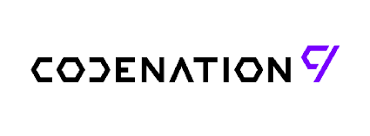

# Desafio 1 - Pré-processamento de dados em Python
__________

### Base de Dados

Utilizado o dataset [Black Friday](https://www.kaggle.com/mehdidag/black-friday) disponibilizado originalmente pela Analytics Vidhya(https://www.analyticsvidhya.com/).

O dataset é composto por variáveis relativas à transações comerciais realizadas durante a Black Friday em uma determinada loja de varejo. 

Cada observação é relativa a um determinado item comprado por um usuário e um usuário pode ter comprado mais de um item.


### Objetivo
O objetivo deste desafio é extrair algumas informações quantitativas que ajude a compreender a natureza dos dados à disposição e ganhar alguns insights sobre o dataset.

Praticar a exploração de datasets utilizando pandas. 

Toda análise pode ser feita no notebook, mas as resposta devem estar nos locais indicados e submetidas ao ambiente criado para a codenation no computador. 

> **Obs.: Por favor, não modifique o nome das funções de resposta (importante para a avaliação)** 

### Requisitos

Verifique se possui as dependências necessárias abaixo: 
Python
Pandas
Numpy
Jupyter Notebook

___________

## _Set up_ da análise

In [186]:
# importa as bibliotecas
import pandas as pd
import numpy as np

In [187]:
# carrega o dataframe
black_friday = pd.read_csv("black_friday.csv")

## Inicie a análise a partir daqui

In [188]:
# verificando as infor gerais do dataframe
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [189]:
# verifica o tamanho do dataframe (linhas e colunas)
print("Tamanho do Dataframe: ", black_friday.shape)
print("\n")

# verifica os 05 primeiros registro do dataframe
black_friday.head()

Tamanho do Dataframe:  (537577, 12)




,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [190]:
# verifica a quantidade de campos faltantes
black_friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [191]:
def q1():
    # retorna o tamanho do Dataframe
    return black_friday.shape

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [245]:
def q2():
    # filtra pelas condições de sexo e idade e depois retorna o total de registros
    bf_filter = black_friday[(black_friday['Gender'] == 'F') & (black_friday['Age'] == '26-35')].shape[0]
    return bf_filter

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [282]:
def q3():
    # filtra pelo valores únicos do campo "User_ID"
    bf_unique_id = black_friday['User_ID'].nunique()
    return bf_unique_id

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [249]:
def q4():
    # conta os valores únicos do dataframe e retorna a quantidade dos tipos existentes
    df_values = len(black_friday.dtypes.value_counts())
    return df_values

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [195]:
def q5():
    # verifica a quantidade de valores nulos do dataframe e pega o maior valor e divide pelo total de registros
    bf_missing_values = max(black_friday.isnull().sum()) / black_friday.shape[0]
    return bf_missing_values

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [196]:
def q6():
    # verifica a quantidade de valores nulos do dataframe e retorna o maior valor
    bf_null_values = max(black_friday.isnull().sum())
    return bf_null_values

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [197]:
def q7():
    # exclui os valores nulls e pega a moda para a coluna Product_Category_3
    bf_frequency = black_friday['Product_Category_3'].dropna().mode()[0]
    return bf_frequency

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

In [198]:
def q8():
    # normaliza os dados com valor min e max e depois calcula a média
    variavel_norm = black_friday['Purchase']
    bf_norm = (variavel_norm - variavel_norm.min()) / (variavel_norm.max()- variavel_norm.min())
    return float(bf_norm.mean())

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [278]:
def q9():
    # padroniza os dados e depois retorna as ocorrências
    var_padronizada = black_friday['Purchase']
    bf_padronizada = (var_padronizada - var_padronizada.mean()) / (var_padronizada.std())
    return int(((bf_padronizada >= -1) & (bf_padronizada <= 1)).count())

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [200]:
def q10():
    # filtra a condição verdadeira e depois compara o tamanho do filtro com a coluna observada
    prod_filter = black_friday[(black_friday['Product_Category_2'].isnull()) & (black_friday['Product_Category_3'].isnull())]
    return bool(len(prod_filter) == black_friday['Product_Category_2'].isnull().sum())

## Conclusão

O Score mínimo para aprovação é 80% e a nota final obtida foi de 100%.  

Alcançado o objetivo do desafio de pré-processamento de dados em Python da Semana 2 do Programa de aceleração em Data Science da Codenation.
